In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

accidents_chunk = pd.read_csv(r'C:\Users\athul\OneDrive\Desktop\AIT664\Accident_Information.csv', 
                              low_memory=False, index_col=None, chunksize=200000)
chunk_list = []
# removing missing values and unwanted data from accidents_chunck
for chunk in accidents_chunk:
    chunk_filter = chunk[
        (chunk.Year.astype(int) >= 2010) &
        (chunk.Year.astype(int) <= 2014) &
        (chunk['Road_Type'] != "Unknown") &
        (chunk['Junction_Detail'] != "Data missing or out of range") &
        (chunk['Road_Surface_Conditions'] != "Data missing or out of range") &
        (chunk['Weather_Conditions'] != "Data missing or out of range") &
        (chunk['Latitude'].notnull()) &
        (chunk['Longitude'].notnull()) &
        (chunk['Special_Conditions_at_Site'] == "None")
    ]
    chunk_list.append(chunk_filter)
accidents = pd.concat(chunk_list)

In [3]:
# data pre-processing
# removing unwanted column values in Weather_Conditions,Light_Conditions
# renaming few columns
def label_weather(row):
    if row['Weather_Conditions'] == 'Fine + high winds':
        return 'Fine'
    elif row['Weather_Conditions'] == 'Fine no high winds':
        return 'Fine'
    elif row['Weather_Conditions'] == 'Raining + high winds':
        return 'Raining'
    elif row['Weather_Conditions'] == 'Raining no high winds':
        return 'Raining'
    elif row['Weather_Conditions'] == 'Snowing + high winds':
        return 'Snowing'
    elif row['Weather_Conditions'] == 'Snowing no high winds':
        return 'Snowing'
    else:
        return row['Weather_Conditions']
accidents['Weather'] = accidents.apply (lambda row: label_weather(row), axis=1)

def label_high_wind(row):
    if row['Weather_Conditions'] == 'Fine + high winds':
        return 'Yes'
    elif row['Weather_Conditions'] == 'Fine no high winds':
        return 'No'
    elif row['Weather_Conditions'] == 'Raining + high winds':
        return 'Yes'
    elif row['Weather_Conditions'] == 'Raining no high winds':
        return 'No'
    elif row['Weather_Conditions'] == 'Snowing + high winds':
        return 'Yes'
    elif row['Weather_Conditions'] == 'Snowing no high winds':
        return 'No'
    else:
        return 'No'
accidents['High_Wind'] = accidents.apply (lambda row: label_high_wind(row), axis=1)
accidents.drop(['Weather_Conditions'], inplace=True, axis=1)

def label_lights(row):
    if row['Light_Conditions'] == 'Darkness - lights lit':
        return 'Darkness - lights'
    elif row['Light_Conditions'] == 'Darkness - lights unlit':
        return 'Darkness - no lights'
    elif row['Light_Conditions'] == 'Darkness - no lighting':
        return 'Darkness - no lights'
    else:
        return row['Light_Conditions']
accidents['Lights'] = accidents.apply (lambda row: label_lights(row), axis=1)
accidents.drop(['Light_Conditions'], inplace=True, axis=1)

# creating a new column Weekend based on Day of Week values
# Weekend - Yes / Not Weekend - No
def label_day_of_week(row):
    if row['Day_of_Week'] == 'Monday':
        return "No"
    elif row['Day_of_Week'] == 'Tuesday':
        return "No"
    elif row['Day_of_Week'] == 'Wednesday':
        return "No"
    elif row['Day_of_Week'] == 'Thursday':
        return "No"
    elif row['Day_of_Week'] == 'Friday':
        return "No"
    elif row['Day_of_Week'] == 'Saturday':
        return "Yes"
    elif row['Day_of_Week'] == 'Sunday':
        return "Yes"

accidents['Weekend'] = accidents.apply (lambda row: label_day_of_week(row), axis=1)

In [4]:
# segregating areas based on Region
east_midlands = [
    'Amber Valley', 'Ashfield', 'Bassetlaw', 'Blaby', 'Bolsover', 'Boston', 'Broxtowe', 'Charnwood', 'Chesterfield',
    'Corby', 'Daventry', 'Derby', 'Derbyshire Dales', 'East Lindsey', 'East Northamptonshire', 'Erewash', 'Gedling',
    'Harborough', 'High Peak', 'Hinckley and Bosworth', 'Kettering', 'Leicester', 'Lincoln', 'Mansfield', 'Melton',
    'Newark and Sherwood', 'North East Derbyshire', 'North Kesteven', 'North West Leicestershire', 'Northampton',
    'Nottingham', 'Oadby and Wigston', 'Rushcliffe', 'Rutland', 'South Derbyshire', 'South Holland', 'South Kesteven',
    'South Northamptonshire', 'Wellingborough', 'West Lindsey'
]
east_england = [
    'Babergh', 'Basildon', 'Bedford', 'Braintree', 'Breckland', 'Brentwood', 'Broadland', 'Broxbourne', 'Cambridge',
    'Castle Point', 'Central Bedfordshire', 'Chelmsford', 'Colchester', 'Dacorum', 'East Cambridgeshire',
    'East Hertfordshire', 'Epping Forest', 'Fenland', 'Forest Heath', 'Great Yarmouth', 'Harlow', 'Hertsmere',
    'Huntingdonshire', 'Ipswich', "King's Lynn and West Norfolk", 'Luton', 'Maldon', 'Mid Suffolk', 'North Hertfordshire',
    'North Norfolk', 'Norwich', 'Peterborough', 'Rochford', 'South Cambridgeshire', 'South Norfolk', 'Southend-on-Sea',
    'St. Albans', 'St. Edmundsbury', 'Stevenage', 'Suffolk Coastal', 'Tendring', 'Three Rivers', 'Thurrock', 'Uttlesford',
    'Watford', 'Waveney', 'Welwyn Hatfield'
]
london = [
    'Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley', 'Camden', 'City of London', 'Croydon', 'Ealing',
    'Enfield', 'Greenwich', 'Hackney', 'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering', 'Hillingdon', 'Hounslow',
    'Islington', 'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham', 'London Airport (Heathrow)', 
    'Merton','Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets', 
    'Waltham Forest', 'Wandsworth', 'Westminster'
]
north_east_england = [
    'County Durham', 'Darlington', 'Gateshead', 'Hartlepool', 'Middlesbrough', 'Newcastle upon Tyne', 'North Tyneside',
    'Northumberland', 'Redcar and Cleveland', 'South Tyneside', 'Stockton-on-Tees', 'Sunderland'
]
north_west_england = [
    'Allerdale', 'Barrow-in-Furness', 'Blackburn with Darwen', 'Blackpool', 'Bolton', 'Burnley', 'Bury', 'Carlisle',
    'Cheshire East', 'Cheshire West and Chester', 'Chorley', 'Copeland', 'Eden', 'Fylde', 'Halton', 'Hyndburn',
    'Knowsley', 'Lancaster', 'Liverpool', 'Manchester', 'Oldham', 'Pendle', 'Preston', 'Ribble Valley', 'Rochdale',
    'Rossendale', 'Salford', 'Sefton', 'South Lakeland', 'South Ribble', 'St. Helens', 'Stockport', 'Tameside',
    'Trafford', 'Warrington', 'West Lancashire', 'Wigan', 'Wirral', 'Wyre'
]
scotland = [
    'Aberdeen City', 'Aberdeenshire', 'Angus', 'Argyll and Bute', 'Clackmannanshire', 'Dumfries and Galloway',
    'Dundee City', 'East Ayrshire', 'East Dunbartonshire', 'East Lothian', 'East Renfrewshire', 'Edinburgh, City of',
    'Falkirk', 'Fife', 'Glasgow City', 'Highland', 'Inverclyde', 'Midlothian', 'Moray', 'North Ayrshire',
    'North Lanarkshire', 'Orkney Islands', 'Perth and Kinross', 'Renfrewshire', 'Scottish Borders', 'Shetland Islands',
    'South Ayrshire', 'South Lanarkshire', 'Stirling', 'West Dunbartonshire', 'West Lothian', 'Western Isles'
]
south_east_england = [
    'Adur', 'Arun', 'Ashford', 'Aylesbury Vale', 'Basingstoke and Deane', 'Bracknell Forest', 'Brighton and Hove',
    'Canterbury', 'Cherwell', 'Chichester', 'Chiltern', 'Crawley', 'Dartford', 'Dover', 'East Hampshire', 'Eastbourne',
    'Eastleigh', 'Elmbridge', 'Epsom and Ewell', 'Fareham', 'Gosport', 'Gravesham', 'Guildford', 'Hart', 'Hastings',
    'Havant', 'Horsham', 'Isle of Wight', 'Lewes', 'Maidstone', 'Medway', 'Mid Sussex', 'Milton Keynes', 'Mole Valley',
    'New Forest', 'Oxford', 'Portsmouth', 'Reading', 'Reigate and Banstead', 'Rother', 'Runnymede', 'Rushmoor',
    'Sevenoaks', 'Shepway', 'Slough', 'South Bucks', 'South Oxfordshire', 'Southampton', 'Spelthorne', 'Surrey Heath',
    'Swale', 'Tandridge', 'Test Valley', 'Thanet', 'Tonbridge and Malling', 'Tunbridge Wells', 'Vale of White Horse',
    'Waverley', 'Wealden', 'West Berkshire', 'West Oxfordshire', 'Winchester', 'Windsor and Maidenhead', 'Woking',
    'Wokingham', 'Worthing', 'Wycombe'
]
south_west_england =[
    'Bath and North East Somerset', 'Bournemouth', 'Bristol, City of', 'Cheltenham', 'Christchurch', 'Cornwall',
    'Cotswold', 'East Devon', 'East Dorset', 'Exeter', 'Forest of Dean', 'Gloucester', 'Mendip', 'Mid Devon',
    'North Devon', 'North Dorset', 'North Somerset', 'Plymouth', 'Poole', 'Purbeck', 'Sedgemoor', 'South Gloucestershire',
    'South Hams', 'South Somerset', 'Stroud', 'Swindon', 'Taunton Deane', 'Teignbridge', 'Tewkesbury', 'Torbay',
    'Torridge', 'West Devon', 'West Dorset', 'West Somerset', 'Weymouth and Portland', 'Wiltshire'
]
wales = [
    'Blaenau Gwent', 'Bridgend', 'Caerphilly', 'Cardiff', 'Carmarthenshire', 'Ceredigion', 'Conwy', 'Denbighshire',
    'Flintshire', 'Gwynedd', 'Isle of Anglesey', 'Merthyr Tydfil', 'Monmouthshire', 'Neath Port Talbot', 'Newport',
    'Pembrokeshire', 'Powys', 'Rhondda, Cynon, Taff', 'Swansea', 'The Vale of Glamorgan', 'Torfaen', 'Wrexham'
]
west_midlands = [
    'Birmingham', 'Bromsgrove', 'Cannock Chase', 'Coventry', 'Dudley', 'East Staffordshire', 'Herefordshire, County of',
    'Lichfield', 'Malvern Hills', 'Newcastle-under-Lyme', 'North Warwickshire', 'Nuneaton and Bedworth', 'Redditch',
    'Rugby', 'Sandwell', 'Shropshire', 'Solihull', 'South Staffordshire', 'Stafford', 'Staffordshire Moorlands',
    'Stoke-on-Trent', 'Stratford-upon-Avon', 'Tamworth', 'Telford and Wrekin', 'Walsall', 'Warwick', 'Wolverhampton',
    'Worcester', 'Wychavon', 'Wyre Forest'
]
yorkshire_and_the_humber = [
    'Barnsley', 'Bradford', 'Calderdale', 'Craven', 'Doncaster', 'East Riding of Yorkshire', 'Hambleton', 'Harrogate',
    'Kingston upon Hull, City of', 'Kirklees', 'Leeds', 'North East Lincolnshire', 'North Lincolnshire', 'Richmondshire',
    'Rotherham', 'Ryedale', 'Scarborough', 'Selby', 'Sheffield', 'Wakefield', 'York'
]

def label_region(row):
    if row['Local_Authority_(District)'] in east_midlands:
        return 'East Midlands'
    elif row['Local_Authority_(District)'] in east_england:
        return 'East England'
    elif row['Local_Authority_(District)'] in london:
        return 'London'
    elif row['Local_Authority_(District)'] in north_east_england:
        return 'North East England'
    elif row['Local_Authority_(District)'] in north_west_england:
        return 'North West England'
    elif row['Local_Authority_(District)'] in scotland:
        return 'Scotland'
    elif row['Local_Authority_(District)'] in south_east_england:
        return 'South East England'
    elif row['Local_Authority_(District)'] in south_west_england:
        return 'South West England'
    elif row['Local_Authority_(District)'] in wales:
        return 'Wales'
    elif row['Local_Authority_(District)'] in west_midlands:
        return 'Wast Midlands'
    elif row['Local_Authority_(District)'] in yorkshire_and_the_humber:
        return 'Yorkshire and the Humber'
accidents['Region'] = accidents.apply (lambda row: label_region(row), axis=1)
accidents.drop(['Local_Authority_(District)'], inplace=True, axis=1)

In [5]:
# grouping based on time
accidents['Date']= pd.to_datetime(accidents['Date'], format="%Y-%m-%d")

# slice first and second string from time column
accidents['Hour'] = accidents['Time'].str[0:2]

# convert new column to numeric datetype
accidents['Hour'] = pd.to_numeric(accidents['Hour'])

# drop null values in our new column
accidents = accidents.dropna(subset=['Hour'])

# cast to integer values
accidents['Hour'] = accidents['Hour'].astype('int')

# define a function that turns the hours into daytime groups
def when_was_it(hour):
    if hour >= 5 and hour < 10:
        return "1"
    elif hour >= 10 and hour < 15:
        return "2"
    elif hour >= 15 and hour < 19:
        return "3"
    elif hour >= 19 and hour < 23:
        return "4"
    else:
        return "5"
    
# create a little dictionary to later look up the groups I created
daytime_groups = {1: 'Morning: Between 5 and 10', 
                  2: 'Office Hours: Between 10 and 15', 
                  3: 'Afternoon Rush: Between 15 and 19', 
                  4: 'Evening: Between 19 and 23', 
                  5: 'Night: Between 23 and 5'}

accidents['Daytime'] = accidents['Hour'].apply(when_was_it)
accidents[['Time', 'Hour', 'Daytime']].head()

,Time,Hour,Daytime
904156,07:30,7,1
904157,18:35,18,3
904158,10:22,10,2
904159,21:21,21,4
904160,20:35,20,4


In [6]:
# drop old time column and temporary hour column
accidents = accidents.drop(columns=['Time', 'Hour'])

# drop columns we don't need
accidents = accidents.drop(columns=['1st_Road_Class','1st_Road_Number','2nd_Road_Class', '2nd_Road_Number', 
                                    'Did_Police_Officer_Attend_Scene_of_Accident',
                                    'Local_Authority_(Highway)','Location_Easting_OSGR', 'Location_Northing_OSGR',
                                    'LSOA_of_Accident_Location','Pedestrian_Crossing-Human_Control', 
                                    'Pedestrian_Crossing-Physical_Facilities','Police_Force','InScotland'])

# drop remaining records with NaN's
accidents = accidents.dropna()

# check if we have no NaN's anymore
accidents.isna().sum().sum()

0

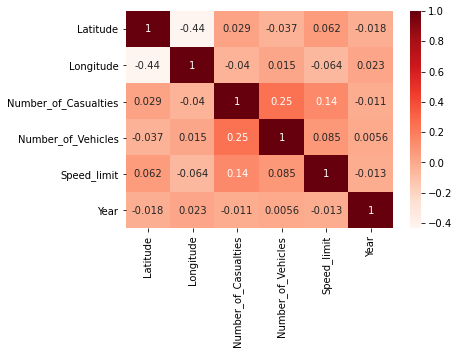

<Figure size 864x720 with 0 Axes>

In [7]:
# correlation plot using Pearson Correlation for accidents data
cor = accidents.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.figure(figsize=(12,10))
plt.show()

In [43]:
vehicles_chunk = pd.read_csv(r'C:\Users\athul\OneDrive\Desktop\AIT664\Vehicle_Information.csv', low_memory=False, 
                              index_col=None, chunksize=200000,encoding = 'ISO-8859-1')

# removing rows where no column Accident_Index in Vehicles with Accidents data
chunk_list = []
for chunk in vehicles_chunk:
    chunk_list.append(chunk)
vehicles = pd.concat(chunk_list)
accidents_interesting_list = accidents['Accident_Index'].tolist()
vehicles = vehicles[vehicles['Accident_Index'].isin(accidents_interesting_list)]

In [44]:
# data pre-processing
# removing unwanted column values in Vehicle Type, Age_Band_of_Driver, Sex_of_Driver, Vehicle_Manoeuvre
# renaming few columns
def label_vehicle_category(row):
    if row['Vehicle_Type'] == 'Bus or coach (17 or more pass seats)':
        return 'Bus/minibus'
    elif row['Vehicle_Type'] == 'Minibus (8 - 16 passenger seats)':
        return 'Bus/minibus'
    elif row['Vehicle_Type'] == 'Taxi/Private hire car':
        return 'Taxi'
    elif row['Vehicle_Type'] == 'Van / Goods 3.5 tonnes mgw or under':
        return 'Van'
    elif row['Vehicle_Type'] == 'Motorcycle 125cc and under':
        return 'Motorcycle'
    elif row['Vehicle_Type'] == 'Motorcycle 50cc and under':
        return 'Motorcycle'
    elif row['Vehicle_Type'] == 'Motorcycle over 125cc and up to 500cc':
        return 'Motorcycle'
    elif row['Vehicle_Type'] == 'Motorcycle over 500cc':
        return 'Motorcycle'
    elif row['Vehicle_Type'] == 'Motorcycle - unknown cc':
        return 'Motorcycle'
    elif row['Vehicle_Type'] == 'Agricultural vehicle':
        return 'Other'
    elif row['Vehicle_Type'] == 'Electric motorcycle':
        return 'Other'
    elif row['Vehicle_Type'] == 'Goods 7.5 tonnes mgw and over':
        return 'Other'
    elif row['Vehicle_Type'] == 'Goods over 3.5t. and under 7.5t':
        return 'Other'
    elif row['Vehicle_Type'] == 'Goods vehicle - unknown weight':
        return 'Other'
    elif row['Vehicle_Type'] == 'Other vehicle':
        return 'Other'
    elif row['Vehicle_Type'] == 'Pedal cycle':
        return 'Other'
    elif row['Vehicle_Type'] == 'Ridden horse':
        return 'Other'
    elif row['Vehicle_Type'] == 'Tram':
        return 'Other'
    elif row['Vehicle_Type'] == 'Data missing or out of range':
        return 'Other'
    elif row['Vehicle_Type'] == 'Mobility scooter':
        return 'Other'
    else:
        return row['Vehicle_Type']
vehicles['Vehicle_Category'] = vehicles.apply (lambda row: label_vehicle_category(row), axis=1)
vehicles.drop(['Vehicle_Type'], inplace=True, axis=1)

# removing missing values out of vehicles dataset
vehicles_uninteresting = vehicles[
    (vehicles['Age_Band_of_Driver'] == 'Data missing or out of range') |
    (vehicles['Age_Band_of_Driver'] == '0 - 5') |
    (vehicles['Age_Band_of_Driver'] == '6 - 10') |
    (vehicles['Age_Band_of_Driver'] == '11 - 15') |
    (vehicles['Age_of_Vehicle'].isnull()) |
    (vehicles['Engine_Capacity_.CC.'].isnull()) |
    (vehicles['make'].isnull()) |
    (vehicles['Sex_of_Driver'] == 'Not known') |
    (vehicles['Sex_of_Driver'] == 'Data missing or out of range') |
    (vehicles['Vehicle_Manoeuvre'] == 'Data missing or out of range')]
accidents_uninteresting_list = vehicles_uninteresting['Accident_Index'].tolist()
vehicles = vehicles[~vehicles['Accident_Index'].isin(accidents_uninteresting_list)]

In [45]:
# drop columns we don't need
vehicles = vehicles.drop(columns = ['make','Driver_IMD_Decile','Junction_Location','model','Skidding_and_Overturning',
                                    'Towing_and_Articulation','Vehicle_Leaving_Carriageway',
                                    'Vehicle_Location.Restricted_Lane','Vehicle_Reference',
                                    'Was_Vehicle_Left_Hand_Drive','X1st_Point_of_Impact','Year'])

print(vehicles)

        Accident_Index Age_Band_of_Driver  Age_of_Vehicle  \
778040   201034NK24510            26 - 35            15.0   
778041   201034NK24550            36 - 45             1.0   
778042   201034NK24550            16 - 20             8.0   
778043   201034NK25900            36 - 45             8.0   
778046   201034NK27090            46 - 55             8.0   
...                ...                ...             ...   
1666852  2014984136414            46 - 55             7.0   
1666853  2014984137514            26 - 35             3.0   
1666854  2014984137514            46 - 55             9.0   
1666858  2014984139614            36 - 45             4.0   
1666859  2014984139614            Over 75            11.0   

                Driver_Home_Area_Type  Engine_Capacity_.CC.  \
778040                     Urban area                1597.0   
778041   Data missing or out of range                 749.0   
778042                     Urban area                1124.0   
778043         

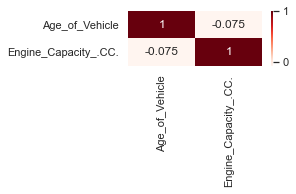

In [46]:
vehicles = vehicles.dropna()
vehicles.isna().sum().sum()
# correlation plot using Pearson Correlation for vehicles data
plt.figure(figsize=(3,1))
cor = vehicles.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [47]:
# combine the accidents with the vehicles table
accidents_data = pd.merge(accidents, vehicles, on='Accident_Index')
accidents_data.to_csv('Mergedfile.csv')
cols = [
'Accident_Index',
'Accident_Severity',
'Carriageway_Hazards',
'Date',
'Daytime',
'Day_of_Week',
'Junction_Detail',
'Latitude',
'Longitude',
'Lights',
'Number_of_Casualties',
'Number_of_Vehicles',
'Road_Surface_Conditions',
'Region',
'Road_Type',
'Speed_limit',
'Urban_or_Rural_Area',
'Weather',
'High_Wind',
'Year',
'Age_Band_of_Driver',
'Age_of_Vehicle',
'Engine_Capacity_.CC.',
'Journey_Purpose_of_Driver',
'Sex_of_Driver',
'Vehicle_Manoeuvre',
'Vehicle_Category',
'Weekend'
]

# merged data - accidents_data exploration
accidents_data = accidents_data[cols]
accidents_data.head(10)
list(accidents_data.columns)
accidents_data.isna().sum()
accidents_data.isnull().sum()

Accident_Index               0
Accident_Severity            0
Carriageway_Hazards          0
Date                         0
Daytime                      0
Day_of_Week                  0
Junction_Detail              0
Latitude                     0
Longitude                    0
Lights                       0
Number_of_Casualties         0
Number_of_Vehicles           0
Road_Surface_Conditions      0
Region                       0
Road_Type                    0
Speed_limit                  0
Urban_or_Rural_Area          0
Weather                      0
High_Wind                    0
Year                         0
Age_Band_of_Driver           0
Age_of_Vehicle               0
Engine_Capacity_.CC.         0
Journey_Purpose_of_Driver    0
Sex_of_Driver                0
Vehicle_Manoeuvre            0
Vehicle_Category             0
Weekend                      0
dtype: int64

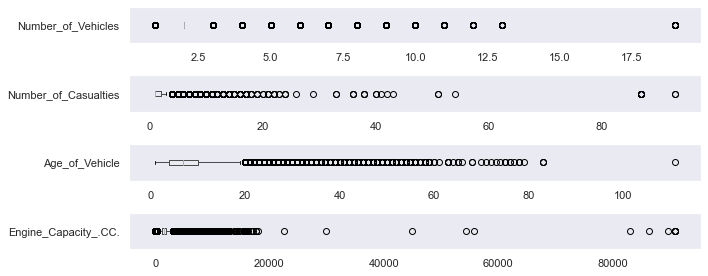

In [13]:
# define numerical columns
num_cols = ['Number_of_Vehicles','Number_of_Casualties','Age_of_Vehicle', 'Engine_Capacity_.CC.']
# plotting boxplots
sns.set(style='darkgrid')
fig, axes = plt.subplots(4,1, figsize=(10,4))

for ax, col in zip(axes, num_cols):
    accidents_data.boxplot(column=col, grid=False, vert=False, ax=ax)
    plt.tight_layout();

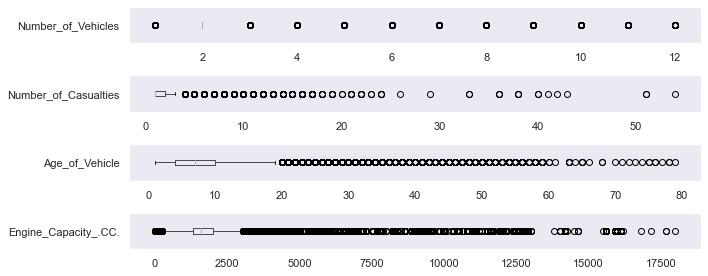

In [14]:
# keep only records that meet the condition and don't fall within extreme outliers
accidents_data = accidents_data[(accidents_data['Engine_Capacity_.CC.'] < 20000)& 
             (accidents_data['Age_of_Vehicle'] < 80) &
             (accidents_data['Number_of_Casualties'] < 60) &
             (accidents_data['Number_of_Vehicles'] < 13.0)]
accidents_data.shape
sns.set(style='darkgrid')
fig, axes = plt.subplots(4,1, figsize=(10,4))

for ax, col in zip(axes, num_cols):
    accidents_data.boxplot(column=col, grid=False, vert=False, ax=ax)
    plt.tight_layout();

In [15]:
accidents_data.corr()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit,Year,Age_of_Vehicle,Engine_Capacity_.CC.
Latitude,1.000000,-0.420038,0.021340,-0.028102,0.039405,-0.015190,-0.075716,0.023191
Longitude,-0.420038,1.000000,-0.029205,0.010086,-0.036211,0.020429,0.021191,0.003718
Number_of_Casualties,0.021340,-0.029205,1.000000,0.282448,0.142582,-0.005908,0.000766,0.006138
Number_of_Vehicles,-0.028102,0.010086,0.282448,1.000000,0.143296,0.002759,-0.043190,-0.015567
Speed_limit,0.039405,-0.036211,0.142582,0.143296,1.000000,-0.010912,-0.013679,0.061700
Year,-0.015190,0.020429,-0.005908,0.002759,-0.010912,1.000000,0.062808,-0.006369
Age_of_Vehicle,-0.075716,0.021191,0.000766,-0.043190,-0.013679,0.062808,1.000000,-0.076876
Engine_Capacity_.CC.,0.023191,0.003718,0.006138,-0.015567,0.061700,-0.006369,-0.076876,1.000000


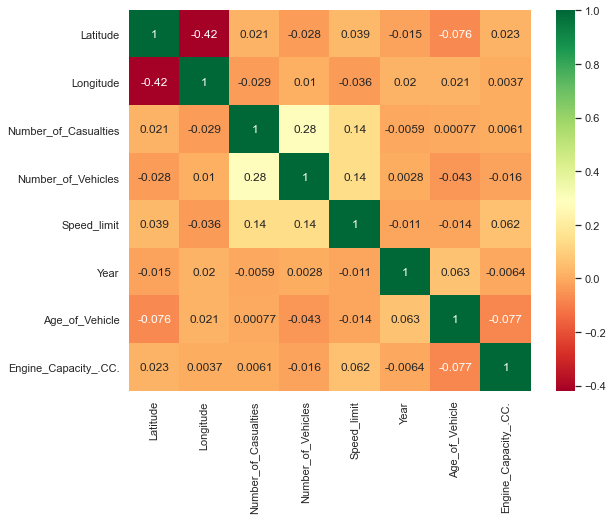

In [16]:
# correlation plot using Pearson Correlation for merged accidents_data
plt.figure(figsize=(9,7))
cor = accidents_data.corr()
sns.heatmap(cor, annot=True, cmap='RdYlGn')
plt.show()

In [17]:
# column datatypes
accidents_data.dtypes

Accident_Index                       object
Accident_Severity                    object
Carriageway_Hazards                  object
Date                         datetime64[ns]
Daytime                              object
Day_of_Week                          object
Junction_Detail                      object
Latitude                            float64
Longitude                           float64
Lights                               object
Number_of_Casualties                  int64
Number_of_Vehicles                    int64
Road_Surface_Conditions              object
Region                               object
Road_Type                            object
Speed_limit                         float64
Urban_or_Rural_Area                  object
Weather                              object
High_Wind                            object
Year                                  int64
Age_Band_of_Driver                   object
Age_of_Vehicle                      float64
Engine_Capacity_.CC.            

In [18]:
# define numerical feature column
num_col = ['Number_of_Vehicles']

# define categorical feature columns
cat_cols = ['Accident_Severity', 'Day_of_Week', 'Daytime', 'Road_Type', 'Speed_limit', 
            'Urban_or_Rural_Area']

# define target column
target_col = ['Number_of_Casualties']

cols = cat_cols + num_cols + target_col

# copy dataframe
df_model = accidents_data[cols].copy()
df_model.shape

(626385, 11)

In [19]:
# create dummy variables from the categorical features
dummies = pd.get_dummies(df_model[cat_cols], drop_first=True)
df_model = pd.concat([df_model[num_cols], df_model[target_col], dummies], axis=1)
df_model.shape
df_model.isna().sum().sum()

0

In [21]:
# define our features 
features = df_model.drop(['Number_of_Casualties'], axis=1)

# define our target
target = df_model[['Number_of_Casualties']]

from sklearn.model_selection import train_test_split

# split our data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

# import regressor
from sklearn.ensemble import RandomForestRegressor

# import metrics
from sklearn.metrics import mean_squared_error, r2_score

# import evaluation tools
from sklearn.model_selection import RandomizedSearchCV

# create RandomForestRegressor
forest = RandomForestRegressor(random_state=4, n_jobs=-1)

# train
forest.fit(X_train, y_train)

# predict
y_train_preds = forest.predict(X_train)
y_test_preds  = forest.predict(X_test)

# evaluate
RMSE = np.sqrt(mean_squared_error(y_test, y_test_preds))
print(f"RMSE: {round(RMSE, 4)}")

r2 = r2_score(y_test, y_test_preds)
print(f"r2: {round(r2, 4)}")

# look at parameters used by our current forest
print('Parameters currently in use:\n')
print(forest.get_params())

RMSE: 0.9255
r2: -0.0443
Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 4, 'verbose': 0, 'warm_start': False}


In [22]:
# create range of candidate numbers of trees in random forest
n_estimators = [100, 150]

# create range of candidate max. numbers of levels in tree
max_depth = [3, 4, 5]

# create range of candidate min. numbers of samples required to split a node
min_samples_split = [10, 15, 20]

# create dictionary with hyperparameter options
hyperparameters = dict(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split)
hyperparameters

{'n_estimators': [100, 150],
 'max_depth': [3, 4, 5],
 'min_samples_split': [10, 15, 20]}

In [23]:
# create RandomForestRegressor with best found hyperparameters
forest = RandomForestRegressor(n_estimators=150, max_depth=5, random_state=4, n_jobs=-1)

# train
forest.fit(X_train, y_train)

# predict
y_train_preds = forest.predict(X_train)
y_test_preds  = forest.predict(X_test)

# evaluate
RMSE = np.sqrt(mean_squared_error(y_test, y_test_preds))
print(f"RMSE: {round(RMSE, 4)}")

r2 = r2_score(y_test, y_test_preds)
print(f"r2: {round(r2, 4)}")

RMSE: 0.8498
r2: 0.1195


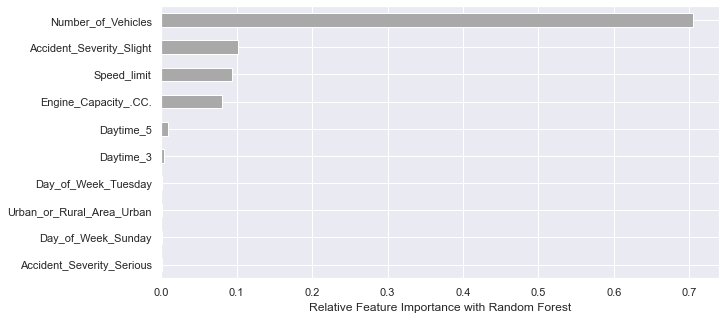

In [24]:
# plot the important features
feat_importances = pd.Series(forest.feature_importances_, index=features.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh', color='darkgrey', figsize=(10,5))
plt.xlabel('Relative Feature Importance with Random Forest');

In [25]:
from sklearn.utils import shuffle

# shuffle the data
accidents2 = shuffle(accidents_data)
import shapefile

# read the shapefile
data_in_shapefile = shapefile.Reader('C:/Users/athul/OneDrive/Desktop/AIT664/UK-postcode-boundaries-Jan-2015/Distribution/Areas')
print(data_in_shapefile.numRecords)

124


In [26]:
# pip install shapely
from shapely.geometry import shape

# Obtain the attributes and the geometry for each record.
attributes, geometry = [], []
field_names = [field[0] for field in data_in_shapefile.fields[1:]]  
for row in data_in_shapefile.shapeRecords():  
    geometry.append(shape(row.shape.__geo_interface__))  
    attributes.append(dict(zip(field_names, row.record))) 
print (attributes)

[{'name': 'AB'}, {'name': 'AL'}, {'name': 'B'}, {'name': 'BA'}, {'name': 'BB'}, {'name': 'BD'}, {'name': 'BH'}, {'name': 'BL'}, {'name': 'BN'}, {'name': 'BR'}, {'name': 'BS'}, {'name': 'CA'}, {'name': 'CB'}, {'name': 'CF'}, {'name': 'CH'}, {'name': 'CM'}, {'name': 'CO'}, {'name': 'CR'}, {'name': 'CT'}, {'name': 'CV'}, {'name': 'CW'}, {'name': 'DA'}, {'name': 'DD'}, {'name': 'DE'}, {'name': 'DG'}, {'name': 'DH'}, {'name': 'DL'}, {'name': 'DN'}, {'name': 'DT'}, {'name': 'DY'}, {'name': 'E'}, {'name': 'EC'}, {'name': 'EH'}, {'name': 'EN'}, {'name': 'EX'}, {'name': 'FK'}, {'name': 'FY'}, {'name': 'G'}, {'name': 'GL'}, {'name': 'GU'}, {'name': 'HA'}, {'name': 'HD'}, {'name': 'HG'}, {'name': 'HP'}, {'name': 'HR'}, {'name': 'HS'}, {'name': 'HU'}, {'name': 'HX'}, {'name': 'IG'}, {'name': 'IP'}, {'name': 'IV'}, {'name': 'KA'}, {'name': 'KT'}, {'name': 'KW'}, {'name': 'KY'}, {'name': 'L'}, {'name': 'LA'}, {'name': 'LD'}, {'name': 'LE'}, {'name': 'LL'}, {'name': 'LN'}, {'name': 'LS'}, {'name': 'L

In [27]:
# pip install geopandas
import geopandas as gpd

# populate a geopandas dataframe
gdf = gpd.GeoDataFrame(data = attributes, geometry = geometry)
gdf.head()

,name,geometry
0,AB,"POLYGON ((-2.21091 56.88580, -2.21858 56.88676..."
1,AL,"POLYGON ((-0.37138 51.68730, -0.37227 51.68781..."
2,B,"POLYGON ((-2.05436 52.24756, -2.05530 52.25006..."
3,BA,"POLYGON ((-2.08430 51.31717, -2.08008 51.31421..."
4,BB,"POLYGON ((-2.21557 53.73160, -2.21541 53.73145..."


In [28]:
from shapely.geometry import Point

# create a function to map the accidents coordinates
def map_accidents_to_areas(longitude, latitude):       
        point = (float(longitude),float(latitude))
        for i in range(len(gdf.geometry)):            
            if Point(point).within(gdf.geometry.loc[i]):
                return gdf.name[i]  

In [29]:
import time
start = time.process_time()
acc = accidents2.iloc[1:300000,:]
acc['Area'] = acc.apply(lambda x: map_accidents_to_areas(x['Longitude'], x['Latitude']), axis=1)
end = time.process_time()
print ("%.2gs" % (end-start))

1.1e+03s


In [30]:
acc_by_area = pd.DataFrame({'Total_accidents' : acc.groupby( ["Area"] ).size()}).reset_index()
# create a lookup function
def find_total_accidents(area_name):
    for i in range(len(acc_by_area.Area)):
        if area_name == acc_by_area.Area.loc[i]:
                return acc_by_area.Total_accidents[i]    
# add a new column to the geopandas dataframe
gdf['Total_accidents'] = gdf.name.apply(find_total_accidents)

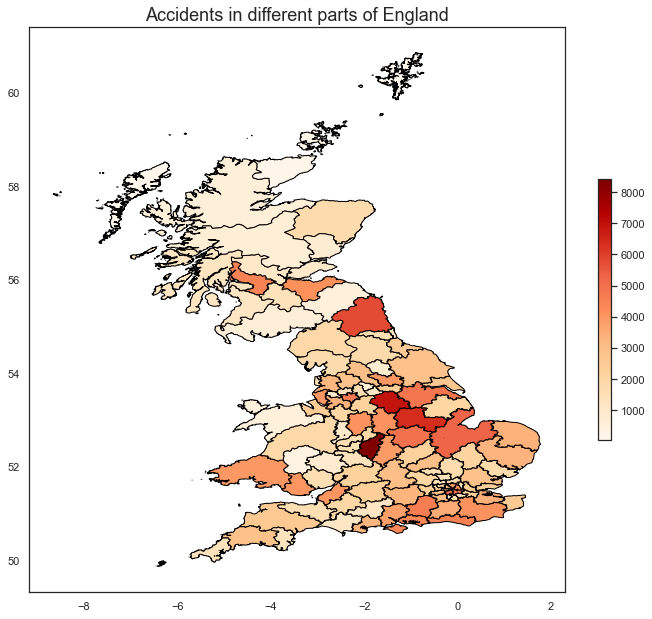

In [45]:
import matplotlib.cm
from matplotlib.colors import Normalize

vmin, vmax = gdf['Total_accidents'].min(), gdf['Total_accidents'].max()

# create a Choropleth map (map where the color of each shape is based on the value of an associated variable)
ax = gdf.plot(column='Total_accidents', cmap='OrRd', edgecolor='black', figsize=(12,12), linewidth=1)
fig = ax.get_figure()
ax.set_title('Accidents in different parts of England',fontsize=18, ha='center')
# create a ScalarMappable object and use the set_array() function to add the accidents counts to it
sm = matplotlib.cm.ScalarMappable(cmap='OrRd', norm=Normalize(vmin=vmin, vmax=vmax))
sm.set_array(gdf['Total_accidents'])
# Then pass it to the colorbar() function and set the shrink argument to 0.4 in order to make the 
# colorbar smaller than the map
fig.colorbar(sm, shrink=0.4)

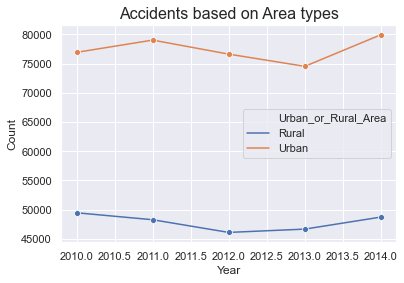

In [32]:
# lineplot - Accidents based on Area types
data = accidents_data.groupby(['Year','Urban_or_Rural_Area']).size().reset_index(name = 'Count')
data
URplot = sns.lineplot(x='Year',
                      y='Count',
                      hue='Urban_or_Rural_Area',
                      data=data, marker="o").set_title('Accidents based on Area types',fontsize=16)
plt.show()

Text(0, 0.5, 'Number of Accidents')

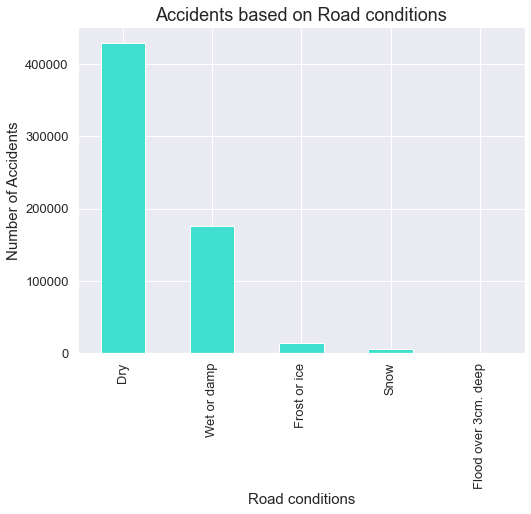

In [32]:
# barplot - Accidents based on Road conditions
ax = accidents_data.Road_Surface_Conditions.value_counts().plot(kind='bar', figsize=(8,6),
                                        color='turquoise', fontsize=13)
ax.set_title('Accidents based on Road conditions', fontsize=18)
ax.set_xlabel('Road conditions', fontsize=15)
ax.set_ylabel('Number of Accidents', fontsize=15)

Text(0, 0.5, 'Number of Accidents')

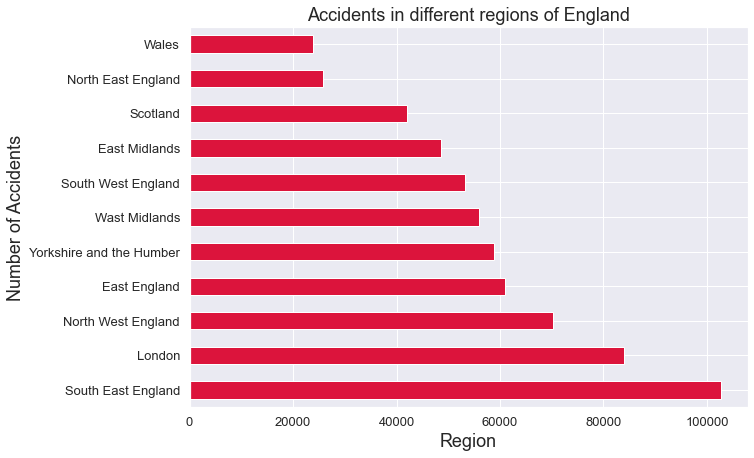

In [34]:
# horizontal barplot - Accidents in different regions of England
ax = accidents_data.Region.value_counts().plot(kind='barh', figsize=(10,7),
                                        color='crimson', fontsize=13)
ax.set_title('Accidents in different regions of England', fontsize=18)
ax.set_xlabel('Region', fontsize=18)
ax.set_ylabel('Number of Accidents', fontsize=18)

Text(0, 0.5, 'Number of Accidents')

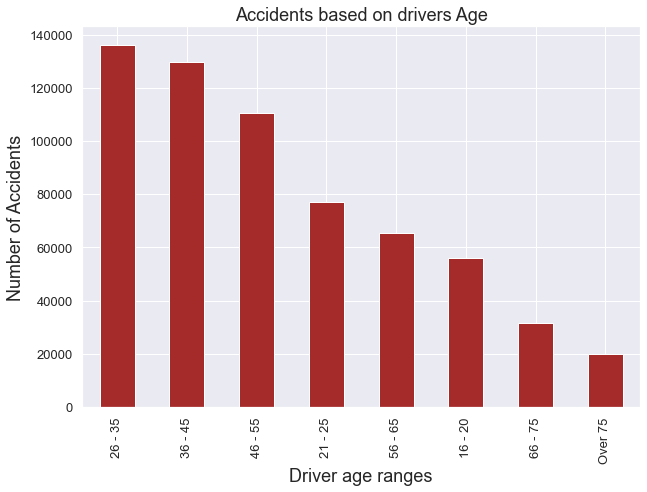

In [35]:
# barplot - Accidents based on drivers Age
ax = accidents_data.Age_Band_of_Driver.value_counts().plot(kind='bar', figsize=(10,7),
                                        color='brown', fontsize=13)
ax.set_title('Accidents based on drivers Age', fontsize=18)
ax.set_xlabel('Driver age ranges', fontsize=18)
ax.set_ylabel('Number of Accidents', fontsize=18)

Text(0, 0.5, 'Number of Accidents')

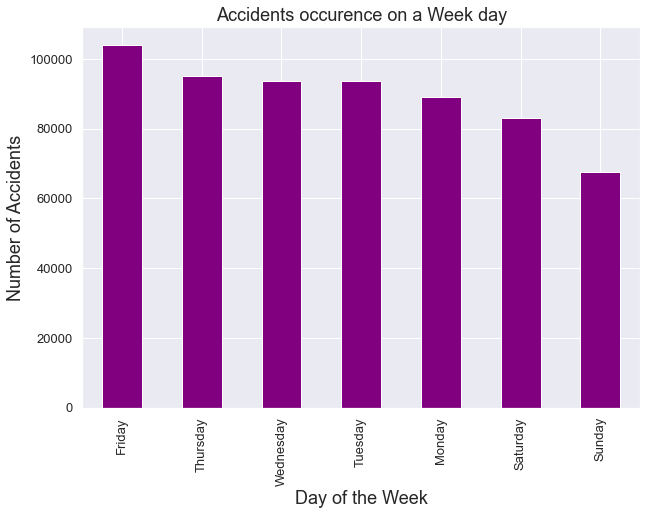

In [36]:
# barplot - Accidents occurence a Week day
ax = accidents_data.Day_of_Week.value_counts().plot(kind='bar', figsize=(10,7),
                                        color='purple', fontsize=13)
ax.set_title('Accidents occurence on a Week day', fontsize=18)
ax.set_xlabel('Day of the Week', fontsize=18)
ax.set_ylabel('Number of Accidents', fontsize=18)

Text(0, 0.5, 'Number of Accidents')

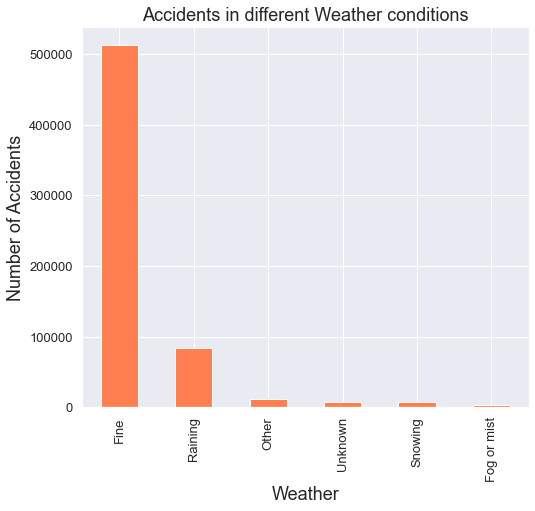

In [37]:
# barplot - Accidents in different Weather conditions
ax = accidents_data.Weather.value_counts().plot(kind='bar', figsize=(8,7),
                                        color='coral', fontsize=13)
ax.set_title('Accidents in different Weather conditions', fontsize=18)
ax.set_xlabel('Weather', fontsize=18)
ax.set_ylabel('Number of Accidents', fontsize=18)

Text(0, 0.5, 'Number of Accidents')

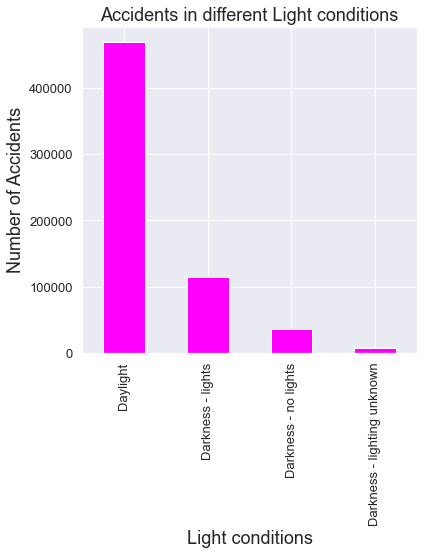

In [30]:
# barplot - Accidents in different Light conditions
ax = accidents_data.Lights.value_counts().plot(kind='bar', figsize=(6,6),
                                        color='magenta', fontsize=13)
ax.set_title('Accidents in different Light conditions', fontsize=18)
ax.set_xlabel('Light conditions', fontsize=18)
ax.set_ylabel('Number of Accidents', fontsize=18)

Text(0, 0.5, 'Number of Accidents')

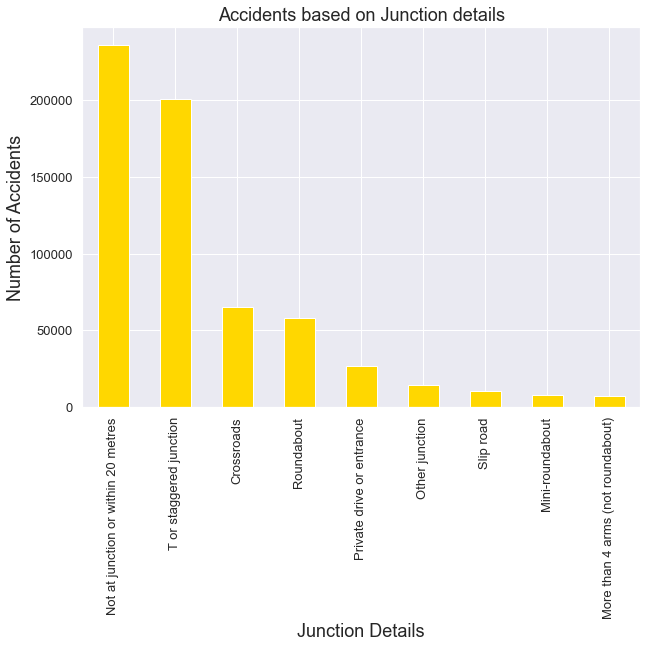

In [39]:
# barplot - Accidents based on Junction details
ax = accidents_data.Junction_Detail.value_counts().plot(kind='bar', figsize=(10,7),
                                        color='gold', fontsize=13)
ax.set_title('Accidents based on Junction details', fontsize=18)
ax.set_xlabel('Junction Details', fontsize=18)
ax.set_ylabel('Number of Accidents', fontsize=18)

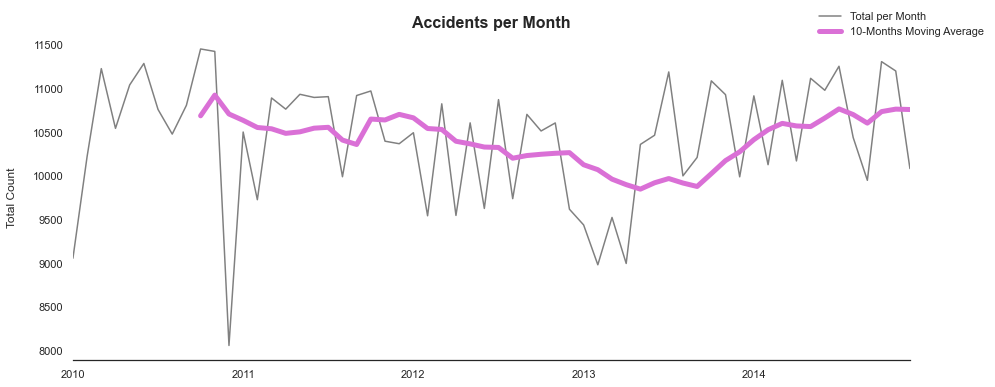

In [40]:
# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(15,6))

# graph-line plot showing yearly accidents count on monthly basis
accidents_data.set_index('Date').resample('M').size().plot(label='Total per Month', color='grey', ax=ax)
accidents_data.set_index('Date').resample('M').size().rolling(window=10).mean()\
                           .plot(color='orchid', linewidth=5, label='10-Months Moving Average', ax=ax)

ax.set_title('Accidents per Month', fontsize=16, fontweight='bold')
ax.set(ylabel='Total Count\n', xlabel='')
ax.legend(bbox_to_anchor=(1.1, 1.1), frameon=False)

# remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=False);

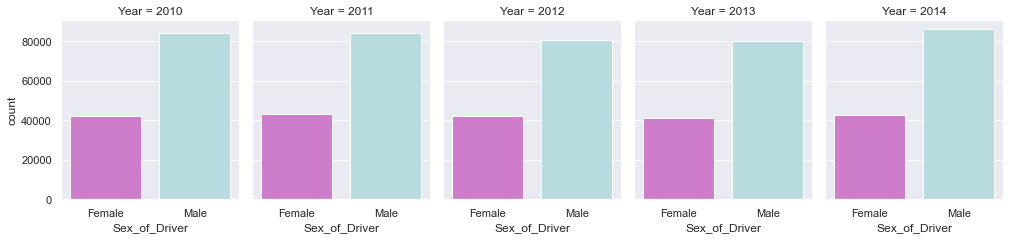

In [34]:
# Plot for Accidents occurence based on Driver gender for years 2010-2014
genderplot = sns.catplot("Sex_of_Driver", col="Year", col_wrap=5,
                data=accidents_data,
                kind="count", height=3.5, aspect=.8, 
                palette=sns.color_palette(['orchid', 'powderblue']))

fig.suptitle('Accidents occurence based on Driver gender for years 2010-2014')
plt.show()

Text(0, 0.5, 'Number of Accidents')

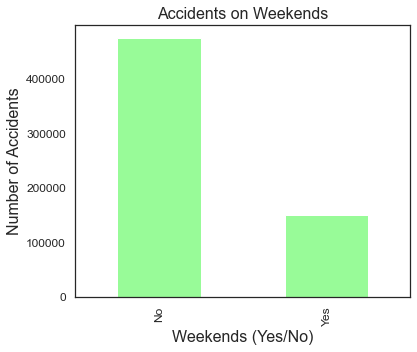

In [42]:
# barchart - Accidents on Weekends
ax = accidents_data.Weekend.value_counts().plot(kind='bar', figsize=(6,5),
                                        color='palegreen', fontsize=12)
ax.set_title('Accidents on Weekends', fontsize=16)
ax.set_xlabel('Weekends (Yes/No)', fontsize=16)
ax.set_ylabel('Number of Accidents', fontsize=16)

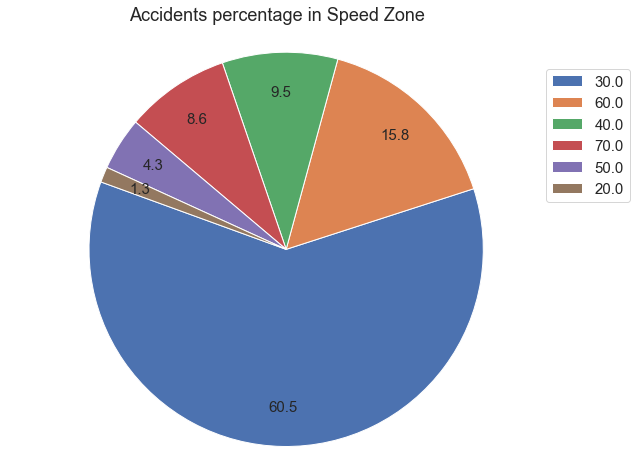

In [43]:
# pie chart - accidents percentage based on speed limits
speed_zone_accidents = accidents_data.loc[accidents_data['Speed_limit'].isin(['20' ,'30' ,'40' ,'50' ,'60' ,'70'])]
speed  = speed_zone_accidents.Speed_limit.value_counts()

explode = (0.0, 0.0, 0.0 , 0.0 ,0.0,0.0) 
plt.figure(figsize=(10,8))
plt.pie(speed.values,  labels=None, 
        autopct='%.1f',pctdistance=0.8, labeldistance=1.9 ,explode = explode, shadow=False, startangle=160,
        textprops={'fontsize': 15})
 
plt.axis('equal')
plt.legend(speed.index, bbox_to_anchor=(1,0.7), loc="center right", fontsize=15, 
           bbox_transform=plt.gcf().transFigure)
plt.figtext(.5,.9,'Accidents percentage in Speed Zone', fontsize=18, ha='center')
plt.show()

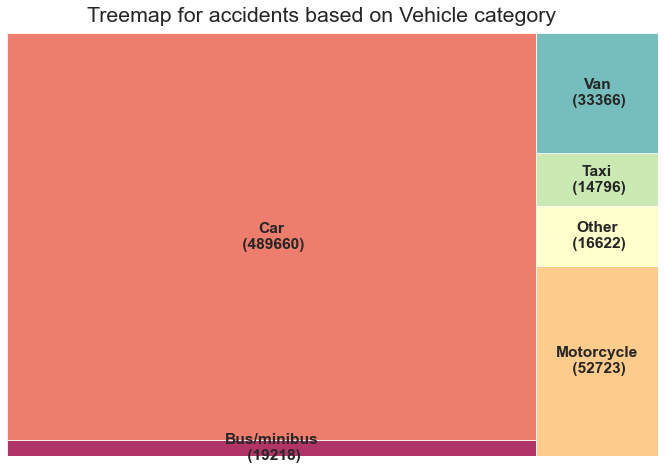

In [44]:
# pip install squarify
import squarify 

# Prepare Data
df = accidents_data.groupby('Vehicle_Category').size().reset_index(name='counts')
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# treemap - Accidents based on Vehicle category
plt.figure(figsize=(12,8), dpi= 70)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8, text_kwargs={'fontsize':16,'weight':'bold'})

# Decorate
plt.figtext(.5,.9,'Treemap for accidents based on Vehicle category', fontsize=22, ha='center')
plt.axis('off')
plt.show()

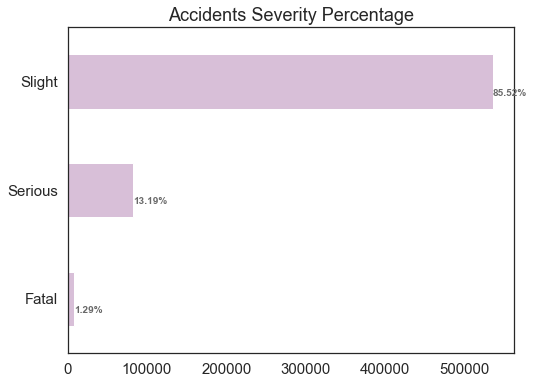

In [58]:
ax = accidents_data['Accident_Severity'].value_counts().plot(kind='barh', figsize=(8,6),
                                        color="thistle", fontsize=15);
ax.set_alpha(0.8)
ax.set_title("Accidents Severity Percentage", fontsize=18)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=10,weight='bold',color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()